# Euro2020in21 Predictions
This notebook predicts the outcome of the games in Euro2020 based on user-defined distributions defined in the ratings columns. Each team contains 2 lists: one list, Offense, contain the probability of scoring (0,1,2,3,4+) goals, and the other list, Defense, contains the probability of conceding the same amount of goals.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Parameters

In [2]:
n_runs = 5000
home_advantage = 0.08
offensive_defensive_ratio = 1

## Ratings
Define the ratings manually in this cell

In [3]:
ratings = {
    'Turkey': {'Offense': [15, 30, 35, 15, 5], 'Defense': [20, 25, 40, 15, 0]},
    'Italy': {'Offense': [5, 28, 47, 15, 5], 'Defense': [50, 30, 20, 0, 0]},
    'Wales': {'Offense': [30, 50, 15, 5, 0], 'Defense': [40, 40, 15, 5, 0]},
    'Switzerland': {'Offense': [15, 25, 35, 20, 5], 'Defense': [30, 30, 30, 10, 0]},
    'Denmark': {'Offense': [10, 20, 40, 20, 10], 'Defense': [45, 35, 20, 0, 0]},
    'Finland': {'Offense': [20, 60, 20, 0, 0], 'Defense': [20, 20, 30, 20, 10]},
    'Belgium': {'Offense': [5, 20, 50, 20, 5], 'Defense': [30, 50, 20, 0, 0]},
    'Russia': {'Offense': [45, 40, 15, 0, 0], 'Defense': [15, 25, 30, 20, 10]},
    'England': {'Offense': [10, 30, 30, 20, 10], 'Defense': [50, 30, 20, 0, 0]},
    'Croatia': {'Offense': [20, 45, 25, 10, 0], 'Defense': [20, 30, 30, 20, 0]},
    'Austria': {'Offense': [25, 60, 10, 5, 0], 'Defense': [20, 40, 25, 25, 0]},
    'NorthMacedonia': {'Offense': [25, 60, 15, 0, 0], 'Defense': [30, 40, 20, 10, 0]},
    'Netherlands': {'Offense': [10, 30, 40, 20, 0], 'Defense': [30, 50, 10, 8, 2]},
    'Ukraine': {'Offense': [20, 60, 20, 0, 0], 'Defense': [20, 60, 15, 5, 0]},
    'Scotland': {'Offense': [20, 55, 25, 0, 0], 'Defense': [20, 50, 20, 10, 0]},
    'CzechRepublic': {'Offense': [25, 40, 25, 10, 0], 'Defense': [20, 30, 30, 15, 5]},
    'Poland': {'Offense': [18, 35, 37, 10, 0], 'Defense': [35, 30, 20, 10, 5]},
    'Slovakia': {'Offense': [40, 45, 15, 0, 0], 'Defense': [25, 35, 30, 10, 0]},
    'Spain': {'Offense': [15, 45, 18, 15, 7], 'Defense': [30, 60, 10, 0, 0]},
    'Sweden': {'Offense': [20, 60, 15, 5, 0], 'Defense': [30, 30, 20, 15, 5]},
    'Hungary': {'Offense': [20, 55, 20, 5, 0], 'Defense': [40, 30, 20, 10, 0]},
    'Portugal': {'Offense': [15, 25, 30, 25, 5], 'Defense': [45, 30, 25, 0, 0]},
    'France': {'Offense': [10, 25, 30, 30, 5], 'Defense': [45, 40, 15, 0, 0]},
    'Germany': {'Offense': [10, 30, 30, 30, 0], 'Defense': [35, 40, 20, 5, 0]}
}

## Visualization of the ratings

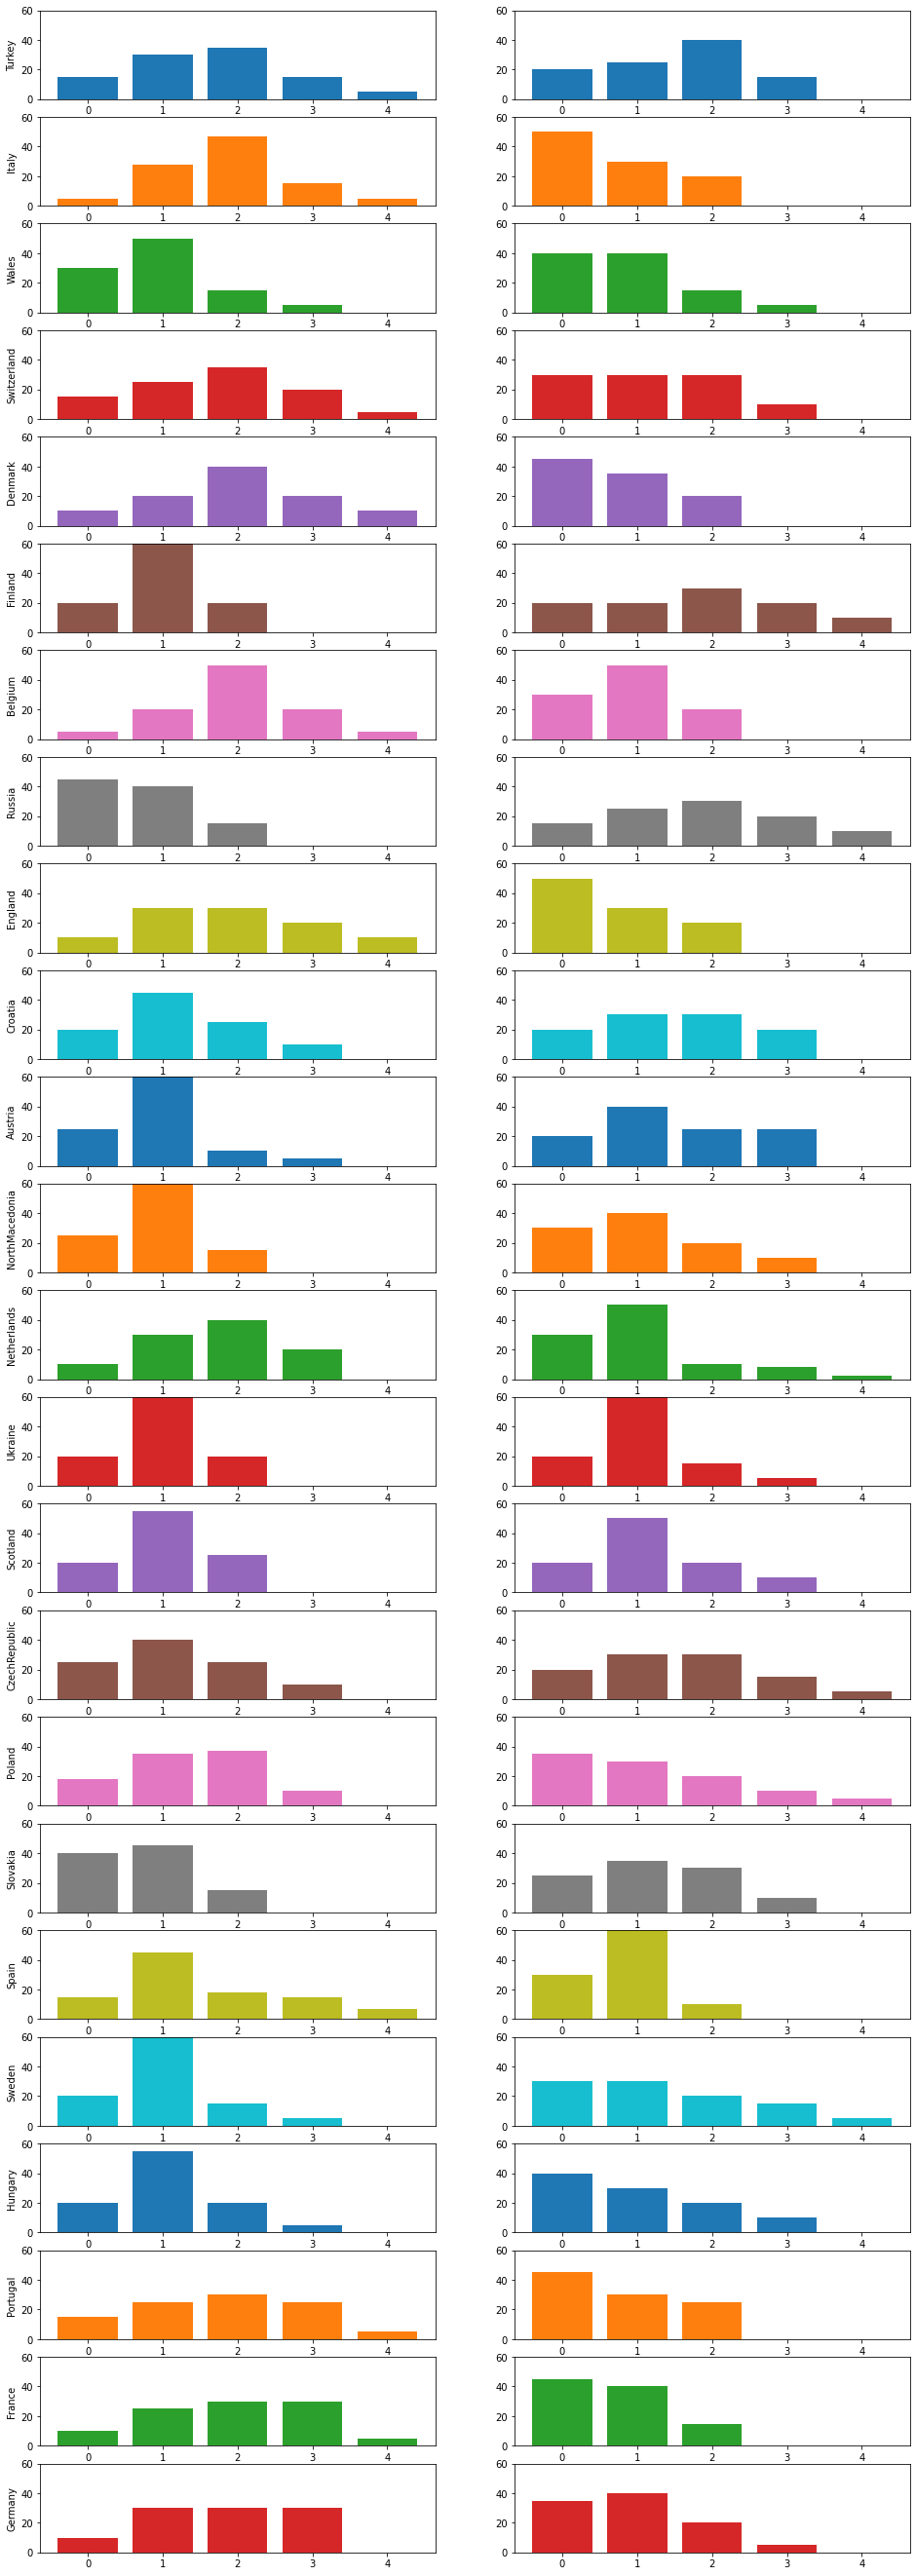

In [4]:
plt.rcParams['figure.figsize'] = (16,48)
for i, nation in enumerate(ratings.keys()):
    plt.subplot(len(ratings.keys()), 2, 2*i+1)
    plt.ylabel(nation)
    plt.ylim([0, 60])
    for j, rating in enumerate(ratings[nation]['Offense']):
        plt.bar(j, rating, color=f'C{i}')
    plt.subplot(len(ratings.keys()), 2, 2*i+2)
    plt.ylim([0, 60])
    for j, rating in enumerate(ratings[nation]['Defense']):
        plt.bar(j, rating, color=f'C{i}')

## Loading the competition schedule

In [5]:
df = pd.read_csv('data/schedule.csv')
df

,Date,Group,Team1,Team2,Hour,Location
0,11 June,GroupA,Turkey,Italy,21:00,Italy
1,12 June,GroupA,Wales,Switzerland,15:00,Azerbaijan
2,12 June,GroupB,Denmark,Finland,18:00,Denmark
3,12 June,GroupB,Belgium,Russia,21:00,Russia
4,13 June,GroupD,England,Croatia,15:00,England
5,13 June,GroupC,Austria,NorthMacedonia,18:00,Romenia
6,13 June,GroupC,Netherlands,Ukraine,21:00,Netherlands
7,14 June,GroupD,Scotland,CzechRepublic,15:00,Scotland
8,14 June,GroupE,Poland,Slovakia,18:00,Russia
9,14 June,GroupE,Spain,Sweden,21:00,Spain


## Predicting the games

In [6]:
def predict_game(team1, team2, advantage):
    if team1 == advantage:
        t1_modifier = 1 + home_advantage
        t2_modifier = 1 - home_advantage
    elif team2 == advantage:
        t1_modifier = 1 - home_advantage
        t2_modifier = 1 + home_advantage
    else:
        t1_modifier = 1
        t2_modifier = 1

    dist_team1 = (np.array(ratings[team1]['Offense']) * offensive_defensive_ratio + np.array(ratings[team2]['Defense'])) / 2
    dist_team1 /= dist_team1.sum()
    dist_team2 = (np.array(ratings[team2]['Offense']) * offensive_defensive_ratio  + np.array(ratings[team1]['Defense'])) / 2
    dist_team2 /= dist_team2.sum()

    results = []
    for _ in range(n_runs):
        results.append([
            np.random.choice([0,1,2,3,4], p=dist_team1),
            np.random.choice([0,1,2,3,4], p=dist_team2)
        ])

    temp_df = pd.DataFrame(results, columns=['Team1', 'Team2'])
    pred = (temp_df.Team1.astype(str) + '-' + temp_df.Team2.astype(str)).mode().iloc[0]

    return [team1, team2, 
            temp_df.Team1.mean().round(1), temp_df.Team2.mean().round(1), 
            pred.split('-')[0], pred.split('-')[1], 
            (1/(temp_df.Team1 > temp_df.Team2).mean()).round(2), (1/(temp_df.Team1 == temp_df.Team2).mean()).round(2), (1/(temp_df.Team1 < temp_df.Team2).mean()).round(2), 
            (1/((temp_df.Team1 + temp_df.Team2) > 2.5).mean()).round(2), (1/((temp_df.Team1 + temp_df.Team2) < 2.5).mean()).round(2), 
            (1/((temp_df.Team1 > 0) & (temp_df.Team2 > 0)).mean()).round(2)
            ]

In [7]:
final_predictions = []
for i, row in df.iterrows():
    if row.Team1 in ratings.keys():
        final_predictions.append(predict_game(row.Team1,row.Team2,row.Location))

In [8]:
pd.DataFrame(final_predictions, columns=['Team1', 'Team2', 'xGTeam1', 'xGTeam2', 'PredTeam1', 'PredTeam2', 'OddT1', 'OddX', 'OddT2', 'OddO25', 'OddU25', 'OddBTTS'])

,Team1,Team2,xGTeam1,xGTeam2,PredTeam1,PredTeam2,OddT1,OddX,OddT2,OddO25,OddU25,OddBTTS
0,Turkey,Italy,1.2,1.7,0,2,4.30,4.06,1.92,1.73,2.37,1.72
1,Wales,Switzerland,1.1,1.3,1,1,3.22,3.62,2.42,2.21,1.82,1.94
2,Denmark,Finland,1.9,0.9,2,1,1.56,4.53,7.27,1.72,2.40,1.72
3,Belgium,Russia,1.9,0.8,2,1,1.44,4.89,9.69,1.75,2.33,1.75
4,England,Croatia,1.7,1.0,1,1,1.80,4.04,5.07,1.91,2.10,1.84
5,Austria,NorthMacedonia,1.0,1.2,1,1,3.51,2.99,2.63,2.69,1.59,1.76
6,Netherlands,Ukraine,1.4,1.0,1,1,2.28,2.97,4.46,2.36,1.74,1.57
7,Scotland,CzechRepublic,1.3,1.2,1,1,2.69,3.26,3.12,2.07,1.93,1.60
8,Poland,Slovakia,1.3,1.0,1,1,2.12,3.60,4.01,2.51,1.66,2.08
9,Spain,Sweden,1.5,0.9,1,1,2.09,3.42,4.38,2.38,1.72,1.77
